In [722]:
# importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [723]:
#importing the dataset

df = pd.read_csv('/content/drive/MyDrive/Problem Set 2/ps2_available_dataset.csv')

In [724]:
df.head()

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC
0,1,74,94.113373,non-female,negative,False,-11.035690,-0.336843,double,1,0
1,1,56,83.337745,non-female,negative,False,-3.982345,-0.018734,none,1,1
2,0,37,81.759240,female,negative,False,6.205701,0.147933,double,1,1
3,1,54,88.549518,female,negative,False,-1.827613,-0.338373,none,1,1
4,0,73,82.171555,female,negative,NaN,-14.637389,-0.369325,none,1,1


In [725]:
# describing the distribution of numerical features of the dataset

df.describe()

,treatment,age,blood_pressure,MeasureA,TestB,GeneB,GeneC
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.358700,60.032800,84.642355,-5.992414,0.004466,0.547900,0.550400
std,0.479643,8.106546,5.266045,4.168837,0.322338,0.497725,0.497478
min,0.000000,29.000000,-99.000000,-21.708000,-0.564197,0.000000,0.000000
25%,0.000000,55.000000,82.314030,-8.790691,-0.251337,0.000000,0.000000
50%,0.000000,60.000000,83.997305,-5.956422,-0.039662,1.000000,1.000000
75%,1.000000,66.000000,86.342954,-3.217110,0.215928,1.000000,1.000000
max,1.000000,92.000000,107.595583,8.889658,1.231447,1.000000,1.000000


In [726]:
# checking for null values in the dataset

df.isnull().sum()

treatment            0
age                  0
blood_pressure       0
gender               0
blood_test           0
family_history    2932
MeasureA             0
TestB                0
GeneA                0
GeneB                0
GeneC                0
dtype: int64



---


family_history has around 29% null values



---






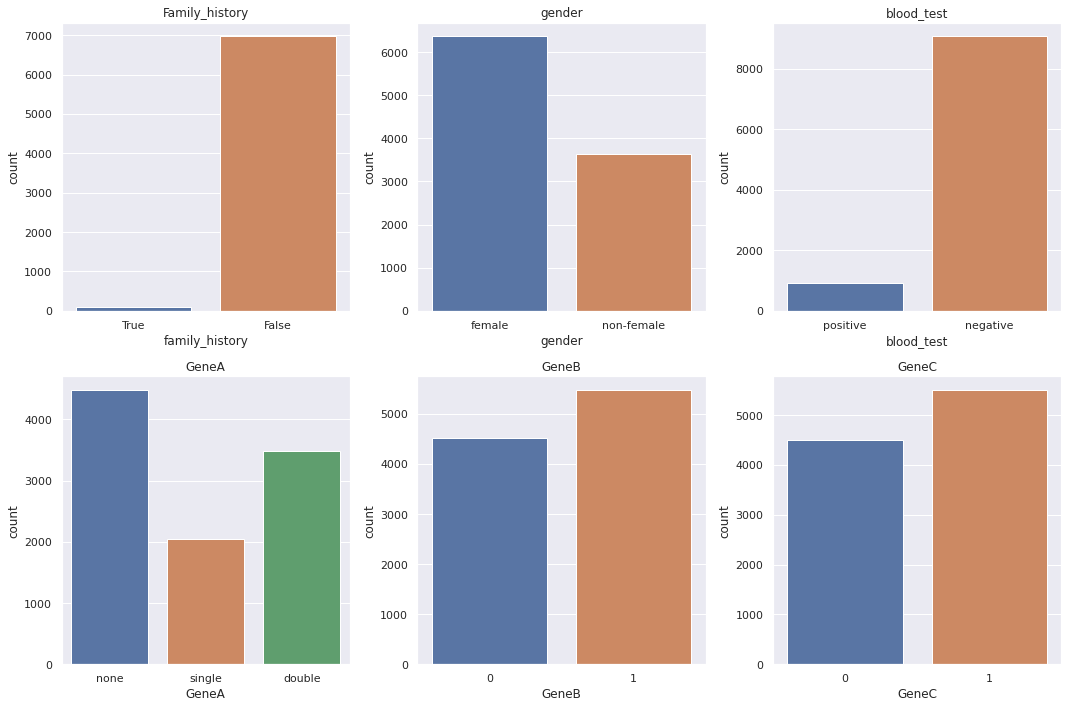

In [727]:
# plotting the composition of categorical features in the dataset

fig, axes = plt.subplots(2,3, figsize=(15,10), sharex=False, sharey=False)

sns.set_theme(style="darkgrid")
sns.axes_style("dark")
sns.countplot(x=df['family_history'], ax=axes[0,0], order=[True,False])
axes[0,0].set_title('Family_history')

sns.countplot(x=df['gender'], ax=axes[0,1], order=['female','non-female'])
axes[0,1].set_title('gender')

sns.countplot(x=df['blood_test'], ax=axes[0,2], order=['positive','negative'])
axes[0,2].set_title('blood_test')

sns.countplot(x=df['GeneA'], ax=axes[1,0], order=['none','single','double'])
axes[1,0].set_title('GeneA')

sns.countplot(x=df['GeneB'], ax=axes[1,1])
axes[1,1].set_title('GeneB')

sns.countplot(x=df['GeneC'], ax=axes[1,2])
axes[1,2].set_title('GeneC')

plt.tight_layout()

In [728]:
# for true values of family_history we check for treatment recommended

df1 = df[df['family_history']==True]
df2 = df1[df1['treatment']==0]
df3 = df1[df1['treatment']==1]
df2.shape, df3.shape

((0, 11), (100, 11))

In [729]:
# for positive values of blood_test we check for treatment recommended

df1 = df[df['blood_test']=='positive']
df2 = df1[df1['treatment']==0]
df3 = df1[df1['treatment']==1]
df2.shape, df3.shape

((673, 11), (260, 11))





---




family_history has a very biased distribution of majority values as 'false' and very small number of 'true' values. Along with this, it has 29% of null data.
With this imbalanced distribution, it is difficult to predict values for the missing observations. Hence, we would ignore these null valued observations from our dataset.



---



In [730]:
# dropping null value observations from the dataset

df.dropna(inplace=True)
df.head()

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC
0,1,74,94.113373,non-female,negative,False,-11.035690,-0.336843,double,1,0
1,1,56,83.337745,non-female,negative,False,-3.982345,-0.018734,none,1,1
2,0,37,81.759240,female,negative,False,6.205701,0.147933,double,1,1
3,1,54,88.549518,female,negative,False,-1.827613,-0.338373,none,1,1
5,0,52,81.778809,female,negative,False,-2.034462,-0.040692,none,1,0




---
Now, the dataset is free of any null values

---





/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[(40.0, 120.0)]

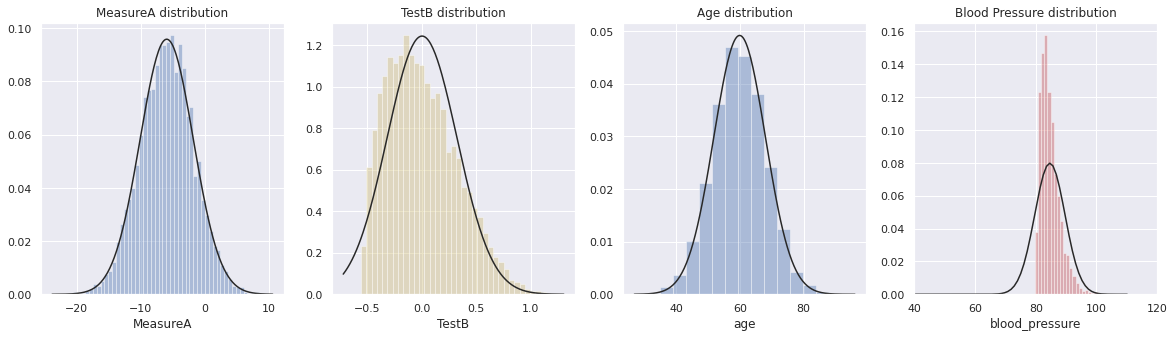

In [731]:
# using the norm package from scipy.stats library to plot the normal curve so as to include a reference normal distribution
# to the distribution of our numerical features MeasureA, TestB, age and blood_pressure

from scipy.stats import norm
fig1, axes1 = plt.subplots(1,4, figsize=(20,5), sharex=False, sharey=False)

sns.distplot(df['MeasureA'], fit=norm, kde=False, ax=axes1[0])
axes1[0].set_title('MeasureA distribution')

sns.distplot(df['TestB'], fit=norm, kde=False, color='y', ax=axes1[1])
axes1[1].set_title('TestB distribution')

sns.distplot(df['age'], fit=norm, kde=False, bins=15 ,ax=axes1[2])
axes1[2].set_title('Age distribution')

a = sns.distplot(df['blood_pressure'], fit=norm, kde=False, color = 'r', ax=axes1[3], bins=200)
axes1[3].set_title('Blood Pressure distribution')
a.set(xlim=(40,120))




---
from the feature description and the graphs above, we observe that blood_pressure has some negative values. Since, that is not possible, we consider this as faulty data and handle it.

---





In [732]:
# checking number of observations with blood_pressure value less than 0

print('Blood pressure less than 0: ',df[df['blood_pressure']<0].count()[0])
print(df['blood_pressure'][df['blood_pressure']<0])

print('Blood pressure less than 80: ',df[df['blood_pressure']<80].count()[0])
print(df['blood_pressure'][df['blood_pressure']<80])

Blood pressure less than 0:  3
1938   -99.0
1954   -99.0
4054   -99.0
Name: blood_pressure, dtype: float64
Blood pressure less than 80:  3
1938   -99.0
1954   -99.0
4054   -99.0
Name: blood_pressure, dtype: float64




---
The observations with blood_pressure less than 0 are same as those less than 80, so we restrict blood_pressure to values 80 or more by replacing those observations with the mean.

---





In [733]:
# Replacing anomalies with the column mean
df['blood_pressure'][1938] = df['blood_pressure'].mean()
df['blood_pressure'][1954] = df['blood_pressure'].mean()
df['blood_pressure'][4054] = df['blood_pressure'].mean()
df.reset_index(drop=True, inplace=True)

# print(df['blood_pressure'][df['blood_pressure']<80])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [734]:
# encoding categorical variables into integer equivalents

map = {'female':1, 'non-female':0}
df.loc[:, 'gender'] = df.gender.map(map)

map1 = {'negative':0, 'positive':1}
df.loc[:, 'blood_test'] = df.blood_test.map(map1)

map2 = {False:0, True:1}
df.loc[:, 'family_history'] = df.family_history.map(map2)

map3 = {'none':0, 'single':1, 'double':2}
df.loc[:, 'GeneA'] = df.GeneA.map(map3)

In [735]:
# viewing the encoded dataset

df.head()

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC
0,1,74,94.113373,0,0,0,-11.035690,-0.336843,2,1,0
1,1,56,83.337745,0,0,0,-3.982345,-0.018734,0,1,1
2,0,37,81.759240,1,0,0,6.205701,0.147933,2,1,1
3,1,54,88.549518,1,0,0,-1.827613,-0.338373,0,1,1
4,0,52,81.778809,1,0,0,-2.034462,-0.040692,0,1,0


In [736]:
df.corr()

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC
treatment,1.000000,-0.147294,0.093475,-0.321952,-0.050201,0.162336,0.142355,0.042063,0.003036,0.029843,0.041178
age,-0.147294,1.000000,-0.005308,-0.008913,-0.014782,-0.000799,-0.970944,0.002526,0.009880,0.023575,0.006706
blood_pressure,0.093475,-0.005308,1.000000,-0.004200,0.009812,-0.018120,0.006325,0.008632,0.021364,-0.002090,-0.008336
gender,-0.321952,-0.008913,-0.004200,1.000000,-0.012619,0.017217,0.011381,0.026275,-0.012522,0.008089,0.010526
blood_test,-0.050201,-0.014782,0.009812,-0.012619,1.000000,-0.000229,0.017416,-0.012629,0.015426,-0.000323,-0.019699
family_history,0.162336,-0.000799,-0.018120,0.017217,-0.000229,1.000000,-0.000034,0.012992,-0.018759,-0.012164,0.008936
MeasureA,0.142355,-0.970944,0.006325,0.011381,0.017416,-0.000034,1.000000,-0.001578,-0.008032,-0.024170,-0.005822
TestB,0.042063,0.002526,0.008632,0.026275,-0.012629,0.012992,-0.001578,1.000000,0.001962,-0.021551,0.014354
GeneA,0.003036,0.009880,0.021364,-0.012522,0.015426,-0.018759,-0.008032,0.001962,1.000000,-0.008785,0.000107
GeneB,0.029843,0.023575,-0.002090,0.008089,-0.000323,-0.012164,-0.024170,-0.021551,-0.008785,1.000000,-0.013953




---
MeasureA and TestB have negative values. We try to preserve their distribution but look to normalize them by squaring their values

---





In [737]:
# # normalizing MeasureA

# df['MeasureA'] = np.square(df['MeasureA'])
# df['MeasureA'] = np.sqrt(df['MeasureA'])



---
We try measuring the correlation of MeasureA and TestB after normalization. It is observed that correlation of MeasureA does not improve even after normalization but correlation of TestB increases considerably. Hence, we only proceed with normalizing TestB

---





In [738]:
# normalizing TestB

df['TestB'] = np.square(df['TestB'])
df['TestB'] = np.sqrt(df['TestB'])

In [739]:
# checking correlation between the variables

df.corr()

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC
treatment,1.000000,-0.147294,0.093475,-0.321952,-0.050201,0.162336,0.142355,0.339402,0.003036,0.029843,0.041178
age,-0.147294,1.000000,-0.005308,-0.008913,-0.014782,-0.000799,-0.970944,0.010254,0.009880,0.023575,0.006706
blood_pressure,0.093475,-0.005308,1.000000,-0.004200,0.009812,-0.018120,0.006325,0.005592,0.021364,-0.002090,-0.008336
gender,-0.321952,-0.008913,-0.004200,1.000000,-0.012619,0.017217,0.011381,0.040276,-0.012522,0.008089,0.010526
blood_test,-0.050201,-0.014782,0.009812,-0.012619,1.000000,-0.000229,0.017416,0.014466,0.015426,-0.000323,-0.019699
family_history,0.162336,-0.000799,-0.018120,0.017217,-0.000229,1.000000,-0.000034,0.018030,-0.018759,-0.012164,0.008936
MeasureA,0.142355,-0.970944,0.006325,0.011381,0.017416,-0.000034,1.000000,-0.007192,-0.008032,-0.024170,-0.005822
TestB,0.339402,0.010254,0.005592,0.040276,0.014466,0.018030,-0.007192,1.000000,-0.005677,0.004951,0.003102
GeneA,0.003036,0.009880,0.021364,-0.012522,0.015426,-0.018759,-0.008032,-0.005677,1.000000,-0.008785,0.000107
GeneB,0.029843,0.023575,-0.002090,0.008089,-0.000323,-0.012164,-0.024170,0.004951,-0.008785,1.000000,-0.013953


In [740]:
# checking data description after normalizing TestB

df.describe()

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000
mean,0.352575,59.924165,84.720086,0.641058,0.090549,0.014148,-5.944857,0.262685,0.898840,0.550509,0.552915
std,0.477806,8.120932,3.268540,0.479724,0.286987,0.118110,4.160564,0.184005,0.886727,0.497477,0.497227
min,0.000000,31.000000,80.021252,0.000000,0.000000,0.000000,-21.708000,0.000158,0.000000,0.000000,0.000000
25%,0.000000,54.000000,82.341646,0.000000,0.000000,0.000000,-8.755337,0.117143,0.000000,0.000000,0.000000
50%,0.000000,60.000000,83.968604,1.000000,0.000000,0.000000,-5.912194,0.236108,1.000000,1.000000,1.000000
75%,1.000000,65.000000,86.302465,1.000000,0.000000,0.000000,-3.145270,0.378666,2.000000,1.000000,1.000000
max,1.000000,92.000000,107.595583,1.000000,1.000000,1.000000,8.462421,1.142016,2.000000,1.000000,1.000000




---
Checking the important variables that contribute to the classification of treatment

---





[Text(0, 0, 'age'),
 Text(0, 0, 'blood_pressure'),
 Text(0, 0, 'gender'),
 Text(0, 0, 'blood_test'),
 Text(0, 0, 'family_history'),
 Text(0, 0, 'MeasureA'),
 Text(0, 0, 'TestB'),
 Text(0, 0, 'GeneA'),
 Text(0, 0, 'GeneB'),
 Text(0, 0, 'GeneC')]

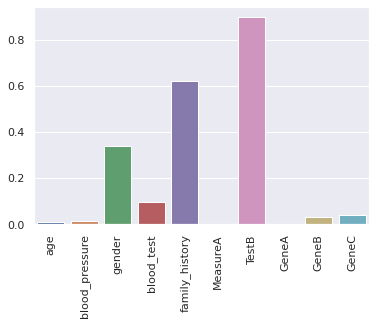

In [741]:
# Checking the importance of variables using LASSO since it works on L1 regularization that leads to changing coefficient of non_important variables to 0

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

y = df['treatment']
x = df.drop('treatment', axis=1)
val = {}
lasso = LassoCV().fit(x, y)
importance = np.abs(lasso.coef_)
feature_names = np.array(list(x.columns))

a = sns.barplot(x=feature_names, y=importance)
loc, labels = plt.xticks()
a.set_xticklabels(labels, rotation=90)

In [742]:
# performing reverse feature elimination to select 8 most important features

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

selected_features = []
cols = ['age','blood_pressure','family_history','MeasureA','TestB','GeneB','GeneC', 'gender', 'blood_test', 'GeneA']
X = df[cols]
y = df['treatment']

model = LogisticRegression(max_iter=700)

# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
selected_features.append(list(X.columns[rfe.support_]))
print('Selected features: %s' % selected_features[0])  

dropped_features = []
for i in cols:
  if i not in selected_features[0]:
    dropped_features.append(i)
    
print('Dropped features: ', dropped_features)

Selected features: ['age', 'blood_pressure', 'family_history', 'TestB', 'GeneB', 'GeneC', 'gender', 'blood_test']
Dropped features:  ['MeasureA', 'GeneA']




---
Using LASSO and Reverse Feature Elimination, it is observed that MeasureA and GeneA are not important in the prediction of 'treatment'. We can drop these features from the dataset

---





In [743]:
# Stratified sampling of data into training and test set to distribute data that represents the population

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

for train_index, test_index in split.split(df,df['treatment']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

train_set.drop(['MeasureA','GeneA'],axis=1,inplace=True)
test_set.drop(['MeasureA','GeneA'],axis=1,inplace=True)

In [744]:
train_set.shape, test_set.shape

((5654, 9), (1414, 9))

In [745]:
train_set.reset_index(drop=True)
test_set.reset_index(drop=True)

,treatment,age,blood_pressure,gender,blood_test,family_history,TestB,GeneB,GeneC
0,0,76,84.974193,1,0,0,0.748596,0,1
1,1,54,87.881147,0,0,0,0.349171,1,1
2,0,59,81.124735,1,0,0,0.077742,1,1
3,0,57,83.397078,1,0,0,0.249529,0,1
4,0,64,80.240234,1,0,0,0.110121,0,0
...,...,...,...,...,...,...,...,...,...
1409,0,60,81.576134,1,0,0,0.339703,1,0
1410,1,48,84.582751,0,0,0,0.387080,1,1
1411,1,71,92.429924,0,0,0,0.389095,1,0
1412,0,61,82.656739,1,0,0,0.111002,0,1


In [746]:
# Cross validation
# Fitting logistic regression on the validation set

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, accuracy_score

X = train_set.drop('treatment', axis=1)
Y = train_set['treatment']
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=2)

reg = LogisticRegression(penalty='none',max_iter=2700)
reg.fit(x_train, y_train)


y_pred = reg.predict(x_val)

score = reg.score(x_val, y_val)
y_pred_proba = reg.predict_proba(x_val)[:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("Accuracy = ", round(accuracy_score(y_val, y_pred)*100, 2),"%")
print("AUC = ", round(auc(fpr, tpr), 4))

print("Coefficients: \n",reg.coef_)

print('\nConfusion Matrix:')
print(confusion_matrix(y_val,y_pred))


Accuracy =  76.39 %
AUC =  0.8468
Coefficients: 
 [[-0.0547512   0.08216749 -1.84939731 -0.63380021 19.17387959  5.27183591
   0.32692533  0.19201761]]

Confusion Matrix:
[[651  90]
 [177 213]]


In [747]:
# Testing model on test set

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, accuracy_score

x_train = train_set.drop('treatment', axis=1)
y_train = train_set['treatment']

x_test = test_set.drop('treatment', axis=1)
y_test = test_set['treatment']

reg = LogisticRegression(penalty='none',max_iter=2700)
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

score = reg.score(x_test, y_test)
y_pred_proba = reg.predict_proba(x_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("Accuracy = ", round(accuracy_score(y_test, y_pred)*100, 2),"%")
print("AUC = ", round(auc(fpr, tpr), 4))

print("Coefficients: \n",reg.coef_)

print('\nConfusion Matrix:')
print(confusion_matrix(y_test,y_pred))


Accuracy =  75.74 %
AUC =  0.8279
Coefficients: 
 [[-0.05741881  0.07876221 -1.88826556 -0.61369115 19.31631668  5.38992756
   0.26119448  0.21528363]]

Confusion Matrix:
[[821  94]
 [249 250]]


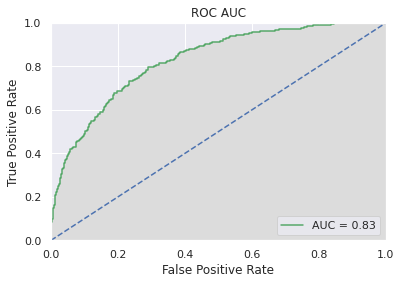

In [748]:
# Plotting the ROC AUC curve

plt.figure()

plt.title('ROC AUC')

plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.fill_between(fpr,tpr, color='#DCDCDC')

plt.show()

In [749]:
coeff = pd.DataFrame(x_train.columns)

coeff['coefficients'] = pd.Series(reg.coef_[0])
coeff['abs_coeff'] = coeff['coefficients'].abs()
coeff.sort_values('abs_coeff', ascending=False, ignore_index=True)

,0,coefficients,abs_coeff
0,family_history,19.316317,19.316317
1,TestB,5.389928,5.389928
2,gender,-1.888266,1.888266
3,blood_test,-0.613691,0.613691
4,GeneB,0.261194,0.261194
5,GeneC,0.215284,0.215284
6,blood_pressure,0.078762,0.078762
7,age,-0.057419,0.057419
